#                                      RESTAURANT RATING PREDICTION

# load csv file

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('nBagg')
import os
os.chdir('F:\internship')
import pandas as pd
import logging

In [144]:
logging.basicConfig(filename='model.log',level=logging.INFO, format = '%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger=logging.getLogger()

In [142]:
logger.info("dataset is being loaded")

2021-08-26 20:21:18,575 - root - INFO - dataset is being loaded


In [137]:
A=pd.read_csv('zomato.csv')
data=pd.DataFrame(A)
data.head(20)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


# Data Preprocessing and EDA

as we no need of adrdress,phone,url column because it indicates no value or gives same information for modelling we look for location only

In [139]:
logger.info("EDA and preprocessing techniques are ")

2021-08-26 20:13:20,501 - root - INFO - EDA and preprocessing techniques are started


In [4]:
data.shape

(51717, 17)

In [145]:
drop_col=['url','phone','address', 'listed_in(city)']
data.drop(drop_col,axis=1,inplace=True)

In [7]:
data.duplicated().sum()

9809

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [8]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            51707, 51708, 51709, 51710, 51711, 51712, 51713, 51714, 51715,
            51716],
           dtype='int64', length=41908)

Changing columns name as per our convinence

In [10]:
data=data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'listed_type'})
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,listed_type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars


In [11]:
data.votes.describe()

count    41908.000000
mean       337.898229
std        881.404533
min          0.000000
25%         11.000000
50%         59.000000
75%        255.000000
max      16832.000000
Name: votes, dtype: float64

there are some restaurent with 0 votes too good insights is it!
and there is a restaurent with 16832 votes too

In [12]:
print(data.shape)
data.isnull().sum()

(41908, 13)


name                0
online_order        0
book_table          0
rate             4252
votes               0
location           14
rest_type         172
dish_liked      20206
cuisines           36
cost              253
reviews_list        0
menu_item           0
listed_type         0
dtype: int64

In [13]:
data['rate'].dtype

dtype('O')

In [14]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
data['rate']=data['rate'].replace('NEW',np.NaN)
data['rate']=data['rate'].replace('-',np.NaN)
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
data.rate=data.rate.astype(str)
data.rate=data.rate.apply(lambda x : x.replace('/5',''))
data.rate=data.rate.astype(float)

we can see the rate column is in str type which is non supported type for ML training so we change into float as per the rating method  and need to convert all catogorical column into numerical we will do at time of modelling after visualization for insights

 so we replaced incorrect value and symbols in rate with NaN value using Replace method

In [17]:
data['rate'].dtype

dtype('float64')

In [18]:
data['cuisines'].isna().sum()

36

In [19]:
data.rest_type.value_counts()

Quick Bites                   14611
Casual Dining                  9068
Cafe                           3143
Delivery                       1966
Dessert Parlor                 1868
                              ...  
Pop Up                            1
Sweet Shop, Dessert Parlor        1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [20]:
data['rest_type'].isnull().sum()

172

In [21]:
data['rest_type'].fillna(value="Quick Bites",inplace=True)

replacing missing values with most occuring value  in rest_type

In [22]:
data['cuisines'].value_counts()

North Indian                                             2305
North Indian, Chinese                                    1893
South Indian                                             1350
Bakery, Desserts                                          698
Biryani                                                   654
                                                         ... 
South Indian, Chinese, Desserts, Beverages                  1
Modern Indian, North Indian                                 1
Mangalorean, Chinese, North Indian, Seafood                 1
Seafood, Hyderabadi, Chinese                                1
North Indian, Mughlai, Chinese, Seafood, South Indian       1
Name: cuisines, Length: 2723, dtype: int64

In [23]:
data['cuisines'].fillna('North Indian'or 'North Indian ,Chinese' or 'South Indian' ,inplace =True)

replacing missing values with most occuring value  in cuisines

In [24]:
data.isna().sum()

name                0
online_order        0
book_table          0
rate             5914
votes               0
location           14
rest_type           0
dish_liked      20206
cuisines            0
cost              253
reviews_list        0
menu_item           0
listed_type         0
dtype: int64

lets reduce the null values of remaining features using replacing means of others or dropping minimal values

In [25]:
data['reviews_list'].dtype

dtype('O')

In [26]:
data.reviews_list.values[:1]

array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said th

In [33]:
#we could extract these values from reviews and take their mean to fill rate column
data.reviews_list.values[1]

'[(\'Rated 4.0\', \'RATED\\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.\'), (\'Rated 3.0\', \'RATED\\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)\'), (\'Rated 3.0\', \'RATED\\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.\'), (\'Rated 4.0\', \'RATED

In [27]:
type(data.reviews_list[1])

str

In [28]:
import ast
ast.literal_eval(data.reviews_list.values[1])

[('Rated 4.0',
  'RATED\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.'),
 ('Rated 3.0',
  'RATED\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)'),
 ('Rated 3.0',
  'RATED\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.'),
 ('Rated 4.0',
  'RATED\n  I wa

In [29]:
%time data.reviews_list=data.reviews_list.apply(lambda x: ast.literal_eval(x))

Wall time: 38.6 s


In [30]:
type(data.reviews_list[100])

list

In [31]:
data.reviews_list[0][0][0].split()[0]

'Rated'

In [32]:
data['reviews_list'].values[1]

[('Rated 4.0',
  'RATED\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.'),
 ('Rated 3.0',
  'RATED\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)'),
 ('Rated 3.0',
  'RATED\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.'),
 ('Rated 4.0',
  'RATED\n  I wa

In [33]:
def extract_from_review_list(x):
    #extract the rate value out of a string inside tuple
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    rate_new= [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate_new)/len(rate_new)),1)

In [34]:
%time data['rate_new']=data.reviews_list.apply(lambda x: extract_from_review_list(x))

Wall time: 1.56 s


In [35]:
data.loc[:,['rate','rate_new']].sample(10)

,rate,rate_new
7691,3.3,3.0
47415,3.3,NaN
16837,3.2,3.7
29130,2.8,2.5
7166,3.7,3.5
9730,NaN,2.2
32937,3.6,3.5
27517,3.0,2.0
7348,NaN,NaN
296,3.8,3.3


In [36]:
# apply the changes
nan_index = data.query('rate != rate & rate_new == rate_new').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'rate_new']

In [37]:
nan_index

Int64Index([   72,    90,   110,   116,   138,   216,   232,   432,   463,
              472,
            ...
            51257, 51382, 51386, 51424, 51445, 51447, 51452, 51487, 51500,
            51586],
           dtype='int64', length=1053)

In [38]:
data.rate.isna().sum()

4861

In [39]:
data.dropna(subset=['rate', 'cost'],inplace=True)

In [40]:
data.drop(['rate_new'],axis=1,inplace=True)

In [41]:
data.isna().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      15277
cuisines            0
cost                0
reviews_list        0
menu_item           0
listed_type         0
dtype: int64

we finllay reduced to zero of null values mostly column 'rate' is filled with mean of review_list for null values 

1.reduce the biggest null values of dish_liked with extracting foods stated by reviewrs in reviews_last because its nearly half of the rows filled with null if we remove it is hard for good prediction \
2.otherwise fill with most occuring values but it will become bias where null values is huge

In [42]:
data.dish_liked

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51709                                                  NaN
51711                                 Biryani, Andhra Meal
51712                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked, Length: 36840, dtype: object

In [43]:
#converting to lowercase
data.dish_liked=data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [44]:
data.dish_liked.head(10)

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
5    onion rings, pasta, kadhai paneer, salads, sal...
6                                                  NaN
7    farmhouse pizza, chocolate banana, virgin moji...
8    pizza, mocktails, coffee, nachos, salad, pasta...
9    waffles, pasta, coleslaw sandwich, choco waffl...
Name: dish_liked, dtype: object

as we can see dishes liked or disliked are mentioned in reviews so if we can extract these dishes we can fill the nan values of dish_liked column
we will start by getting a list of all the dishes available from our dataset

In [45]:
dish_list=[]
for i in list(data.index):
        #print(type(data.dish_liked[i])) #checking whether it shows  index and dish_name type
        if data.dish_liked[i]!='NaN' and isinstance(data.dish_liked[i],str):
            k=data['dish_liked'][i].split(',')
            dish_list.extend(k)
print(dish_list)

['pasta', ' lunch buffet', ' masala papad', ' paneer lajawab', ' tomato shorba', ' dum biryani', ' sweet corn soup', 'momos', ' lunch buffet', ' chocolate nirvana', ' thai green curry', ' paneer tikka', ' dum biryani', ' chicken biryani', 'churros', ' cannelloni', ' minestrone soup', ' hot chocolate', ' pink sauce pasta', ' salsa', ' veg supreme pizza', 'masala dosa', 'panipuri', ' gol gappe', 'onion rings', ' pasta', ' kadhai paneer', ' salads', ' salad', ' roti', ' jeera rice', 'farmhouse pizza', ' chocolate banana', ' virgin mojito', ' pasta', ' paneer tikka', ' lime soda', ' prawn pizza', 'pizza', ' mocktails', ' coffee', ' nachos', ' salad', ' pasta', ' sandwiches', 'waffles', ' pasta', ' coleslaw sandwich', ' choco waffle', ' tacos', ' momos', ' cheese nachos', 'waffles', ' pasta', ' crispy chicken', ' honey chilli chicken', ' sandwich', ' coffee', ' crepe', 'mocktails', ' peri fries', ' lasagne', ' pizza', ' chicken bbq wings', ' virgin mojito', ' nachos', 'coffee', ' spaghetti'

In [46]:
len(dish_list)

118363

In [47]:
dish_list=set(dish_list) #getting unique dishes values

In [48]:
len(dish_list)

3507

In [49]:
p=data.reviews_list[0]
' '.join([i[1].replace('RATED\n ','') for i in p]).replace('\n','').replace('\S+','').replace('?','').replace('Ã','').replace('\\x','').strip().lower()

'a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.cheers  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this place is mostly visited by vegetarians. anyways we ordered ala carte items which took ages to come

In [50]:
# clear the text
def clear_text(t):
    '''
    clear the input text t
    '''
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
 replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [51]:
data['reviews_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [54]:
dish_list.intersection(data['reviews_text'][100].split())

{'rice', 'thali', 'vegetarian'}

In [55]:
data['dish_liked_new']=data.reviews_text.apply(lambda x: ', '.join(list(dish_list.intersection(x.split()))))

In [56]:
data.dish_liked_new.isna().sum()

0

In [57]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_liked_new']].sample(5,random_state=1)

,dish_liked,dish_liked_new
35277,NaN,"chicken, fries, shawarma"
11918,NaN,chicken
44043,NaN,"chicken, tikka, biryani"
3703,NaN,"coffee, roti, tea"
51190,NaN,"vegetarian, chicken, prawn"


In [58]:
nan_index=data.query('dish_liked !=dish_liked & dish_liked_new==dish_liked_new').index

In [59]:
%%time
for i in nan_index:
    data.loc[i,'dish_liked']=data.loc[i,'dish_liked_new'] 

Wall time: 46.9 s


In [60]:
data.drop(['dish_liked_new','reviews_text'],axis=1,inplace=True)

In [61]:
data.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
listed_type     0
dtype: int64

finally we got them to zero null values let do some binary opertion for simple catogorical values now later we will do encoding

# simple encoding for simple features

In [62]:
data['online_order']=pd.get_dummies(data.online_order,drop_first=True)
data['book_table']=pd.get_dummies(data.book_table,drop_first=True)

In [66]:
data['cost']=data['cost'].astype(str)
data['cost']=data['cost'].apply(lambda v:v.replace(',',''))
data['cost']=data['cost'].astype(float)

In [67]:
data['cost'].dtype
data['votes'].dtype

dtype('int64')

changing type of variables to numerical 

In [ ]:
logger.info("process is completed")

In [69]:
logger.info("visulization part of datasets have begin ")

# INSIGHTS AND VISUALIZATION (using matplotlib,seaborn) OF OUR DATASETS 

OVERALL VIEW OF OUR DATASETS)

<IPython.core.display.Javascript object>


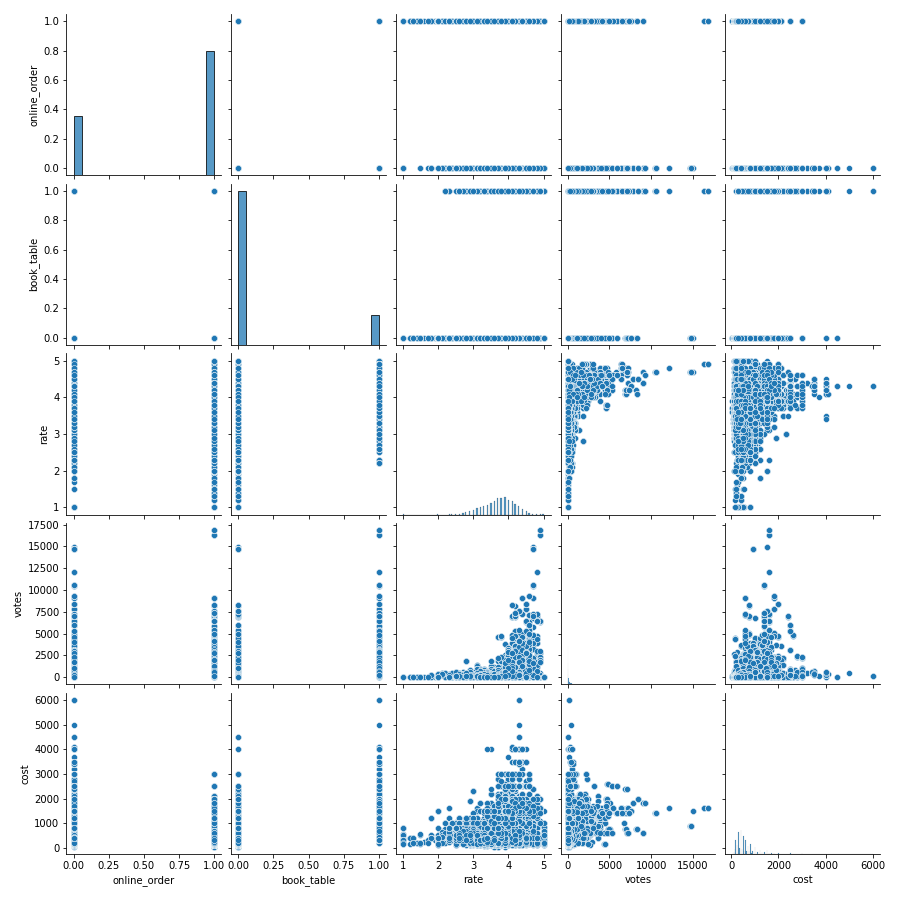

In [64]:
sns.pairplot(data=data)

In [65]:
data['book_table'].value_counts()

0    30807
1     6033
Name: book_table, dtype: int64

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


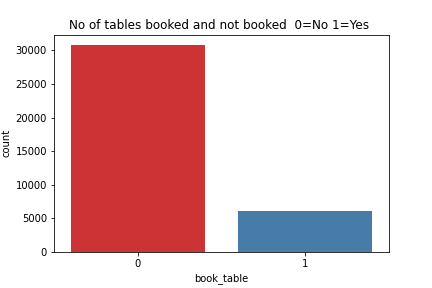

<function matplotlib.pyplot.show(block=None)>

In [63]:
sns.countplot(data.book_table,palette = "Set1")
plt.title('No of tables booked and not booked  0=No 1=Yes ')
plt.show

In [64]:
data['online_order'].value_counts()

1    24977
0    11863
Name: online_order, dtype: int64

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


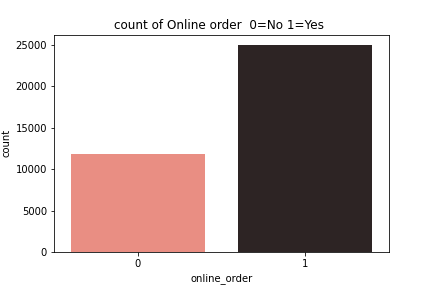

<function matplotlib.pyplot.show(block=None)>

In [65]:
sns.countplot(data.online_order,palette = "dark:salmon_r")
plt.title('count of Online order  0=No 1=Yes ')
plt.show

RESTAURANTS NAME AND ITS COUNTS 

In [68]:
data['name'].value_counts()

Onesta                         85
Cafe Coffee Day                84
Empire Restaurant              69
Kanti Sweets                   66
Just Bake                      62
                               ..
Al Ghani Resetaurant            1
Shiva Sai Andhra Hotel          1
Uttara Karanataka Mess          1
Desi Aahar                      1
The Shake Factory Originals     1
Name: name, Length: 6863, dtype: int64

<IPython.core.display.Javascript object>


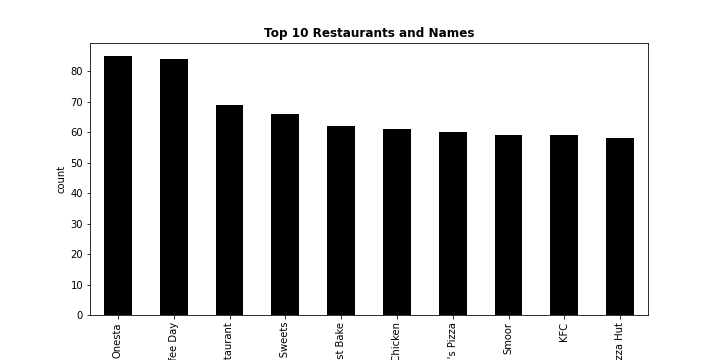

In [66]:
plt.figure(figsize=(10,5))
data.name.value_counts()[:10].plot(kind='bar',color='black')
plt.title("Top 10 Restaurants and Names",weight='bold')
plt.ylabel('count')
plt.show()

INSIGHTS OF LOCATIONS AND RESTAURANTS 

In [70]:
data['location'].value_counts()

BTM                      3161
Koramangala 5th Block    2056
HSR                      1807
Indiranagar              1793
Whitefield               1620
                         ... 
West Bangalore              4
Yelahanka                   4
Rajarajeshwari Nagar        2
Peenya                      1
Nagarbhavi                  1
Name: location, Length: 92, dtype: int64

<IPython.core.display.Javascript object>


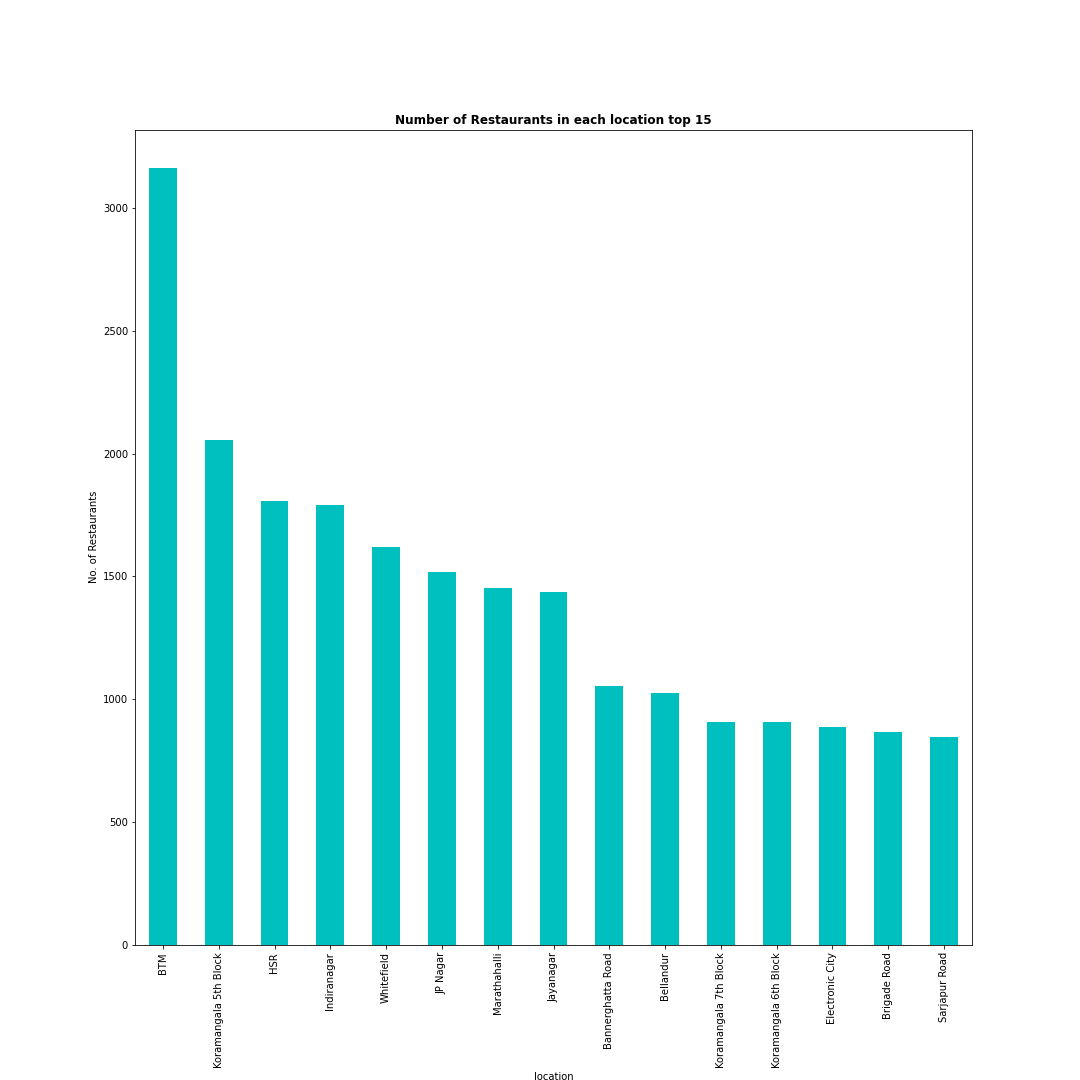

In [71]:
plt.figure(figsize=(15,15))
ax =data.location.value_counts()[:15].plot(kind='bar',color='c')
plt.title('Number of Restaurants in each location top 15', weight='bold',)
plt.xlabel('location')
plt.ylabel('No. of Restaurants')
plt.show()

<IPython.core.display.Javascript object>


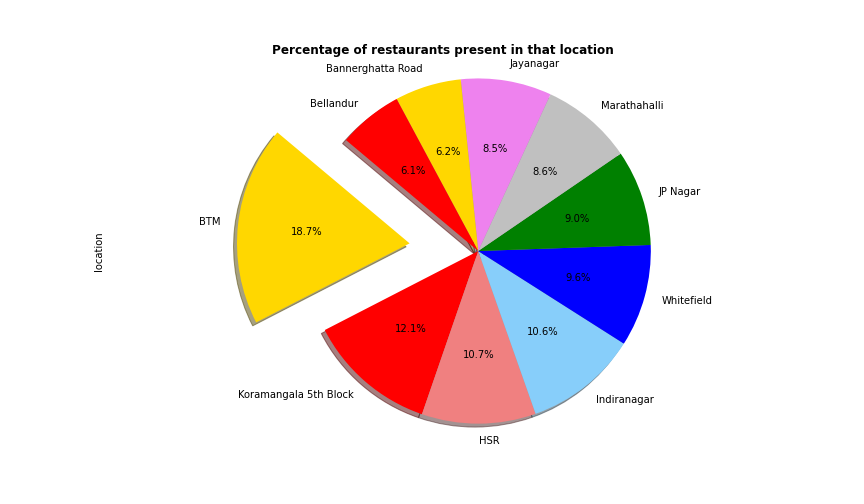

Text(0.5, 1.0, 'Percentage of restaurants present in that location')

In [72]:
plt.figure(figsize=(12,7))
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver','violet']
explode = (0.4, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice
ax=data.location.value_counts()[:10].plot(kind='pie',explode=explode,shadow=True,colors=colors,startangle=140,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')

RESTAURANTS TYPE AND COUNTS 

In [73]:
data['rest_type'].value_counts()

Quick Bites                   12127
Casual Dining                  8722
Cafe                           2982
Dessert Parlor                 1665
Delivery                       1490
                              ...  
Cafe, Food Court                  2
Dessert Parlor, Kiosk             2
Bakery, Beverage Shop             1
Quick Bites, Kiosk                1
Dessert Parlor, Food Court        1
Name: rest_type, Length: 88, dtype: int64

<IPython.core.display.Javascript object>


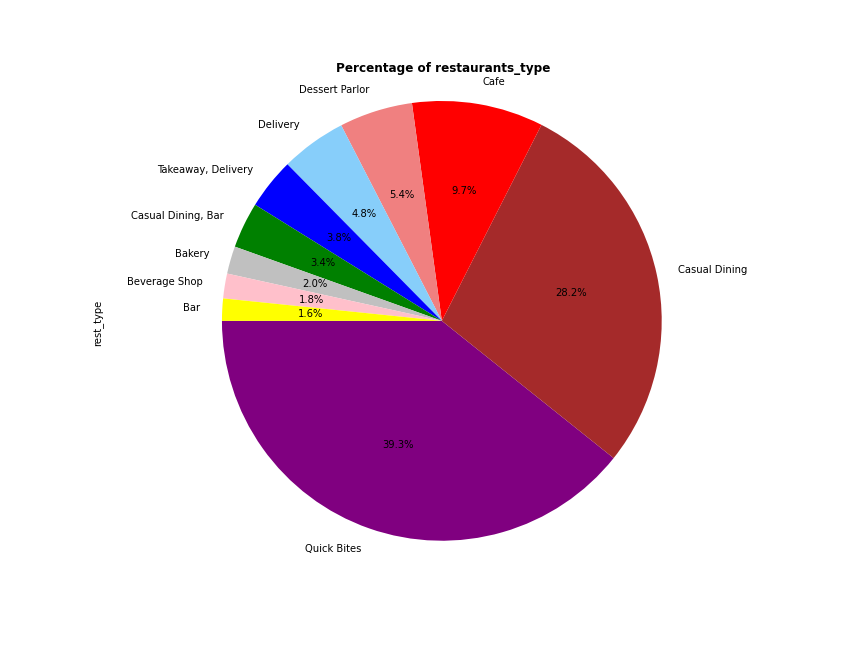

Text(0.5, 1.0, 'Percentage of restaurants_type')

In [74]:
plt.figure(figsize=(12,9))
colors = ['purple','brown', 'red', 'lightcoral', 'lightskyblue','blue','green','silver','pink','yellow']
ax=data.rest_type.value_counts()[:10].plot(kind='pie',colors=colors,startangle=180,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Percentage of restaurants_type", weight = 'bold')

In [67]:
M=data['cost'].max()
m=data['cost'].min()
a=data['cost'].mean()
print('maxiumum cost is {0} , mimimum cost is {1} , average cost per two is {2}'.format((M),(m),(a)))

maxiumum cost is 6000.0 , mimimum cost is 40.0 , average cost per two is 612.8159066232356


Listed_type is visualized using treemap for better visual of counts and understadings

<IPython.core.display.Javascript object>


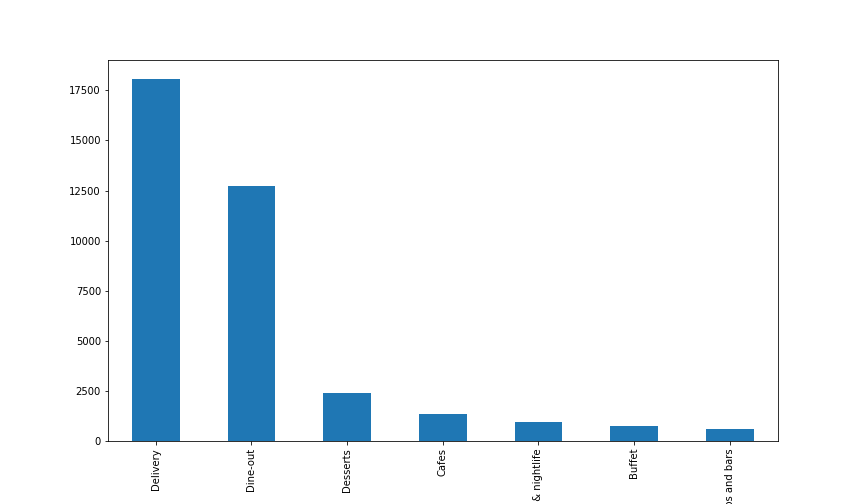

In [68]:
plt.figure(figsize=(12,7))
data.listed_type.value_counts().plot(kind='bar')
plt.show()

In [227]:
data['listed_type'].value_counts()

Delivery              18084
Dine-out              12729
Desserts               2382
Cafes                  1333
Drinks & nightlife      952
Buffet                  757
Pubs and bars           603
Name: listed_type, dtype: int64

<IPython.core.display.Javascript object>


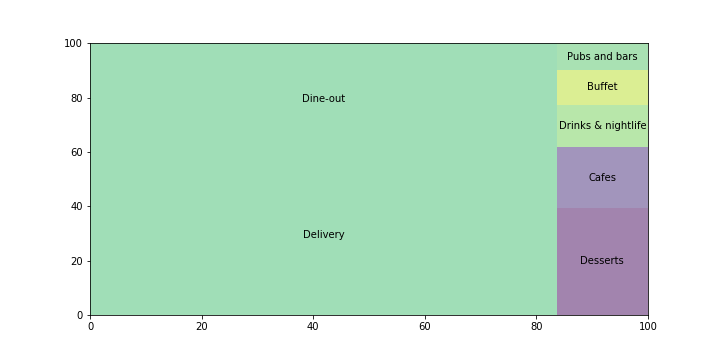

In [77]:
import squarify 
plt.figure(figsize=(10,5))
squarify.plot(sizes=data.listed_type.value_counts(),label=['Delivery',
'Dine-out',
'Desserts',     
'Cafes',  
'Drinks & nightlife',   
'Buffet',                  
'Pubs and bars'],alpha=0.5, norm_x=100)
plt.show()

<IPython.core.display.Javascript object>


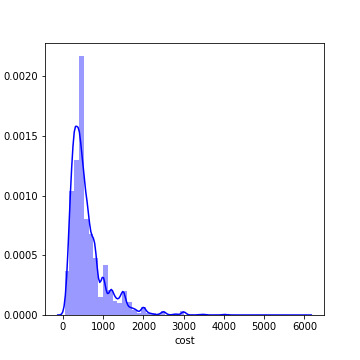

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [79]:
plt.figure(figsize=(5,5))
sns.distplot(data['cost'],color='blue')
plt.show()

lets check Normal distribution of our label(y)

<IPython.core.display.Javascript object>


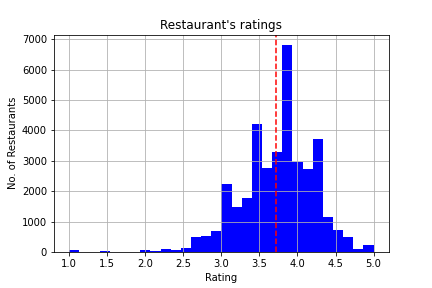

3.7208279044516828


In [80]:
data.rate.hist(color='b',bins=30)
plt.axvline(x=data.rate.mean(),color='red',ls='--')
plt.title("Restaurant's ratings")
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants')
plt.show()
print(data.rate.mean())

Lets go into little good Insights

In [81]:
data['cost'].value_counts()

400.0     4734
300.0     4514
500.0     3664
600.0     2909
200.0     2732
          ... 
240.0        2
5000.0       1
70.0         1
3700.0       1
80.0         1
Name: cost, Length: 63, dtype: int64

<IPython.core.display.Javascript object>


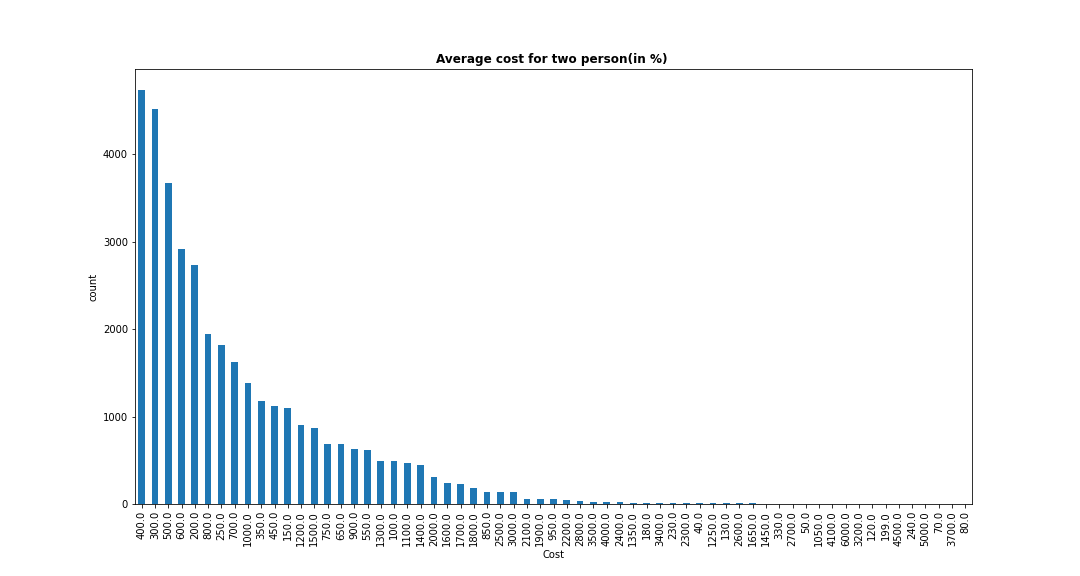

In [251]:
plt.figure(figsize=(15,8))
data['cost'].value_counts().plot(kind='bar')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.xlabel('Cost')
plt.ylabel('count')
plt.show()
    
    



<IPython.core.display.Javascript object>


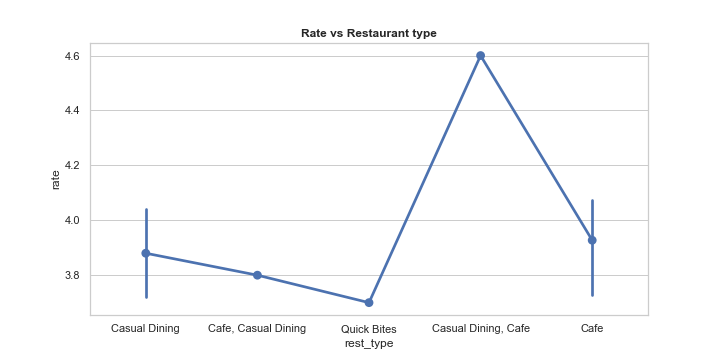

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [236]:
fig=plt.figure(figsize=(10,5))
sns.pointplot(data['rest_type'][:20], data['rate']).set_title('Rate vs Restaurant type',weight='bold')
sns.set_theme(style='darkgrid')
plt.show()

<IPython.core.display.Javascript object>


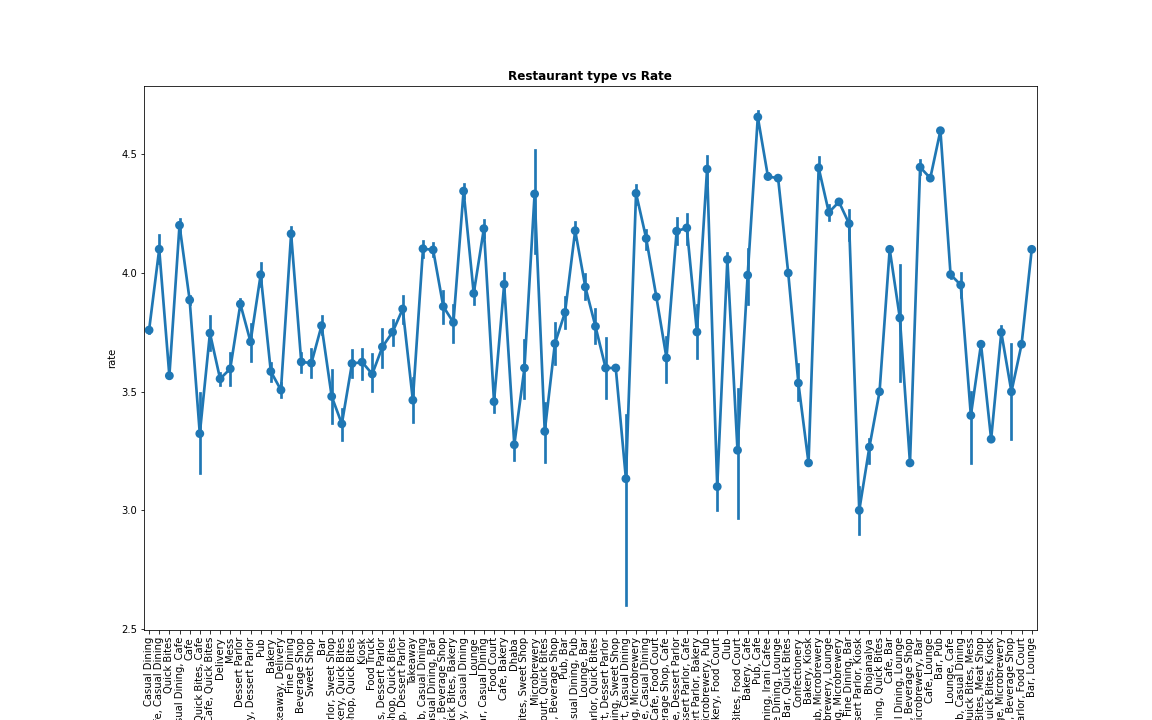

In [70]:
f,ax=plt.subplots(figsize=(16,10))
g=sns.pointplot(y='rate',x='rest_type',data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Restaurant type vs Rate', weight = 'bold')
plt.show()

Most favourite dishes in restaurants

<IPython.core.display.Javascript object>


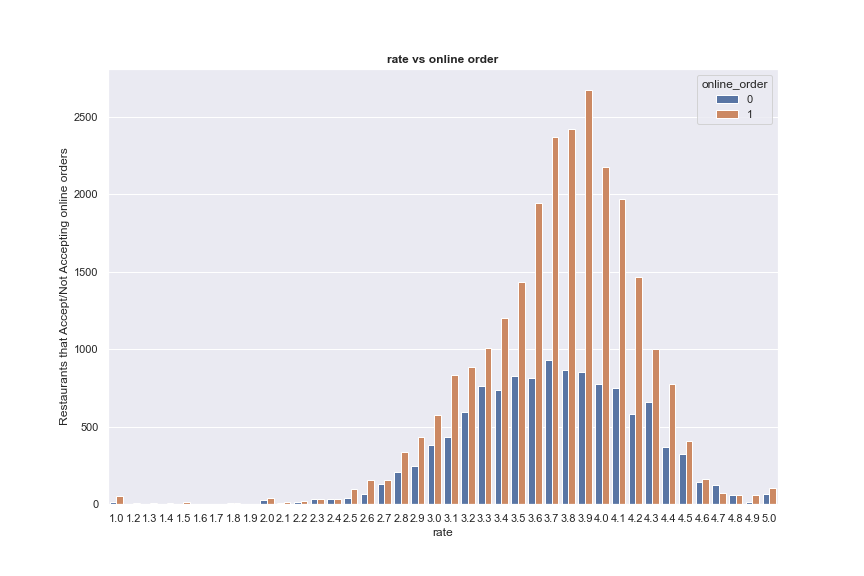

In [238]:
f,ax=plt.subplots(figsize=(12,8))
sns.countplot(x='rate',data=data,hue='online_order').set_title("rate vs online order",weight = 'bold')
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.show()

<IPython.core.display.Javascript object>


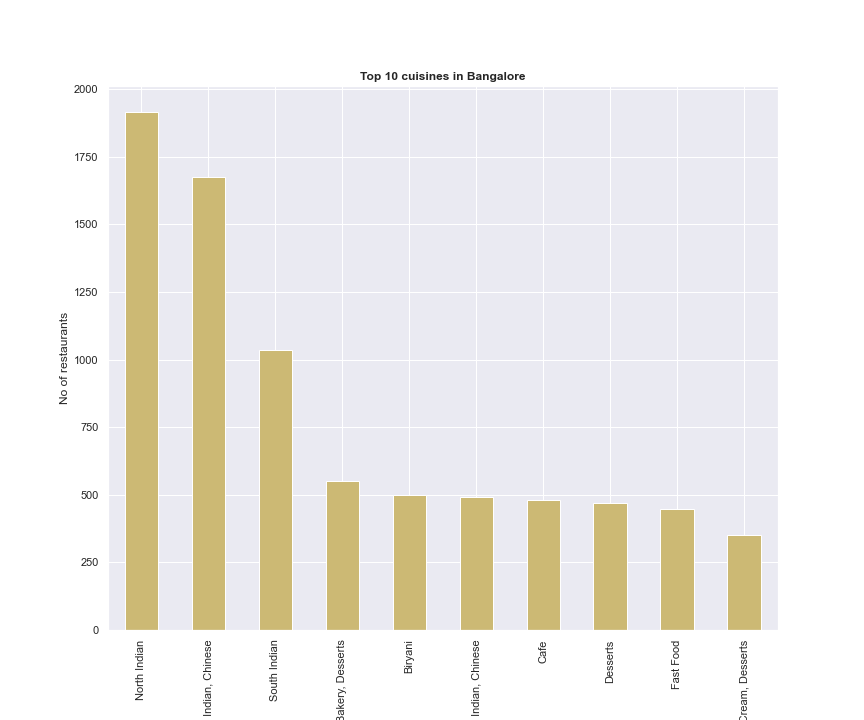

Text(0, 0.5, 'No of restaurants')

In [246]:
plt.figure(figsize=(12,10))
data.cuisines.value_counts()[:10].plot(kind='bar',color='y').set_title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

In [ ]:
logger.info("visulaization is occured with good insights")

# Feature Engineering ( Label Encoding) 

LABEL ENCODING AND DROP UNREQUIRED COLUMNS FOR TRAINING

In [ ]:
logger.info("Feature engineering occured for changing catogorical into numerical")

In [69]:
fdata=data.copy()

In [71]:
fdata.drop(['reviews_list','name'],axis=1,inplace=True)
fdata.drop(['dish_liked'],axis=1,inplace=True)
fdata.drop(['listed_type'],axis=1,inplace=True)

In [72]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
list1=['rest_type','location','cuisines','menu_item']
for i in list1:
    fdata[i]=LE.fit_transform(fdata[i])
fdata.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,25,1934,800.0,8519
1,1,0,4.1,787,1,25,831,800.0,8519
2,1,0,3.8,918,1,20,662,800.0,8519
3,0,0,3.7,88,1,74,2275,300.0,8519
4,0,0,3.8,166,4,25,1963,600.0,8519


In [73]:
fdata.sample(10)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
27532,1,0,4.1,37,46,44,1074,500.0,8519
12762,1,1,3.8,203,70,25,1773,1200.0,6061
42325,1,1,4.4,705,27,25,2180,1000.0,3150
28906,1,0,4.1,205,44,74,1111,250.0,8519
45053,1,0,2.7,125,27,74,873,500.0,2190
5672,0,0,3.8,29,15,12,298,400.0,8519
42526,1,1,4.2,2854,69,27,1395,800.0,1125
21378,0,1,4.0,166,29,25,2282,1000.0,8519
25149,0,1,3.9,74,35,26,887,1200.0,8519
32307,1,0,3.2,55,0,74,1687,300.0,3153


# Checking multicolinearity  and correlation factors 

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=fdata[['online_order','book_table','votes','location','rest_type','cuisines','cost','menu_item']]

vif= pd.DataFrame()
vif["features"] = X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       features       VIF
0  online_order  2.477391
1    book_table  2.045187
2         votes  1.436185
3      location  2.797395
4     rest_type  4.388674
5      cuisines  4.348975
6          cost  4.536319
7     menu_item  6.167825


as VIF is below 10 so it is normal to have the getted VIF values for multicolinearity

# Data transformation and Features Scaling

WE USING LABEL ENCODED FEATURES FOR OUR MODEL BUILDING

In [75]:
fdata.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 4.5, 2.9, 3.5, 1. , 2.6, 3.4, 5. , 2.5, 2.7, 2. , 4.7,
       4.8, 1.8, 2.4, 2.2, 2.3, 4.9, 2.1, 1.5, 1.3, 1.4, 1.2, 1.6, 1.9,
       1.7])

In [76]:
fdata.shape #using label encoder

(36840, 9)

In [77]:
Features=fdata.drop(['rate'],axis=1)
Features.shape

(36840, 8)

In [78]:
Features.dtypes

online_order      uint8
book_table        uint8
votes             int64
location          int32
rest_type         int32
cuisines          int32
cost            float64
menu_item         int32
dtype: object

<IPython.core.display.Javascript object>


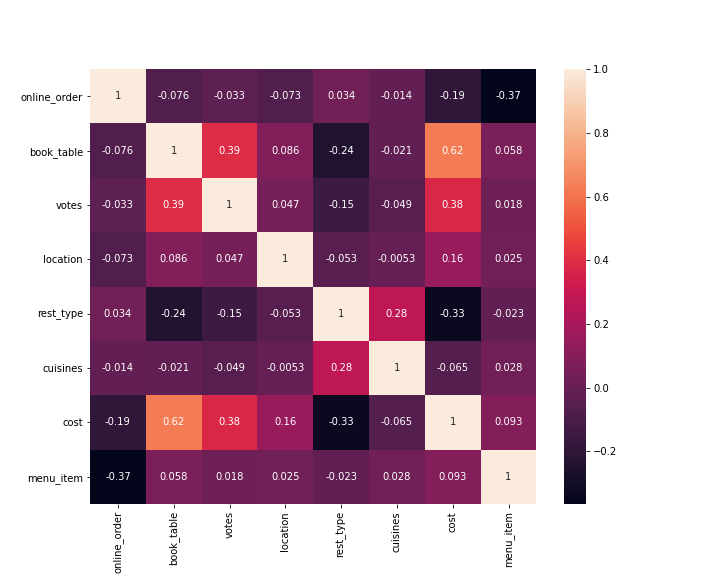

<AxesSubplot:>

In [148]:
corr=Features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [69]:
fdata['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 4.5, 2.9, 3.5, 1. , 2.6, 3.4, 5. , 2.5, 2.7, 2. , 4.7,
       4.8, 1.8, 2.4, 2.2, 2.3, 4.9, 2.1, 1.5, 1.3, 1.4, 1.2, 1.6, 1.9,
       1.7])

In [79]:
label=fdata['rate'].values
label

array([4.1, 4.1, 3.8, ..., 3.6, 4.3, 3.4])

# Splitting Datasets

Splitting the datasets into train and test data to see how our model performs to untrained datas
train set = 80% and test set =20%

In [140]:
logger.info("splitting datasets into train and test data to perform modeling")

2021-08-26 20:18:14,615 - root - INFO - splitting datasets into train and test data to perform modeling


In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Features,label,test_size=0.2,random_state=42)

In [82]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29472, 8), (7368, 8), (29472,), (7368,))

# REGRESSION MODELS

# 1.linear regression

In [114]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
logger.info('linear regression is being called for modeling')

2021-08-26 18:51:51,878 - root - INFO - linear regression is being called for modeling


In [106]:
LR.fit(X_train,y_train)
logger.info("data is trained")

2021-08-26 18:46:56,047 - root - INFO - data is trained


In [107]:
print(LR.score(X_train,y_train))
print(LR.score(X_test,y_test))
print('intercept =',LR.intercept_)
print('coefficient =',LR.coef_)
logger.info("scores of test data and train data are obtained")

2021-08-26 18:46:56,795 - root - INFO - scores of test data and train data are obtained


0.2521094277636017
0.2515574316910786
intercept = 3.583851245490316
coefficient = [ 8.31825689e-02  2.71049417e-01  1.38248442e-04  3.13250858e-04
 -1.29647082e-03 -1.87671096e-05  1.26524732e-04 -2.97450750e-06]


PREDICTION USING Linear Regression

In [111]:
YP=LR.predict(X_test)
logger.info('label is predicted using features as {}'.format(YP))

2021-08-26 18:48:51,428 - root - INFO - label is predicted using features as [3.45917883 4.08589484 3.7308315  ... 3.63593848 3.70979344 3.63199288]


In [99]:
from sklearn.metrics import r2_score
LR=r2_score(y_test,YP)*100
print("Accuracy score for LR:",LR)
logger.info('accuracy of linear regression is {}'.format(LR))

2021-08-26 18:46:00,003 - root - INFO - accuracy of linear regression is 25.155743169107858


Accuracy score for LR: 25.155743169107858


Prediction is not up to the mark in linear regression as it score is just 25% 

# 2. Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF.fit(X_train,y_train)
RF_predict=RF.predict(X_test)
logger.info('Random Forest Regressor is being called for modeling')
logger.info(RF_predict)

2021-08-26 18:54:48,434 - root - INFO - Random Forest Regressor is being called for modeling
2021-08-26 18:54:48,449 - root - INFO - [3.53965753 3.69511882 3.55686262 ... 3.44001723 3.41016721 3.77079338]


In [77]:
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

0.9261632888075391
0.8145548079656548


SAMPLE TESTING

In [274]:
#new=pd.DataFrame({'a':[1],'b':[0], 'c':[918],'d':[1],'e':[20],'f':[662],'g':[800.0],'h':[8519]})
#predicted=RF.predict(new)
#predicted

array([3.80397837])

lets compare our obtained output with actual output

In [89]:
sample=pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":np.round(RF_predict,2)})
sample

,Actual Rating,Predicted Rating
0,3.6,3.54
1,3.7,3.70
2,3.0,3.56
3,3.1,3.16
4,3.3,3.35
...,...,...
7363,4.0,3.98
7364,4.2,4.19
7365,3.6,3.44
7366,3.4,3.41


R^2 = (Y-Y^)^2 ------ (expected-predicted)^2

In [117]:
from sklearn.metrics import r2_score
RFr2=r2_score(y_test,RF_predict)*100
print("Accuracy score for RF:",RFr2)
logger.info('Accuracy of Random Forest is {}'.format(RFr2))

2021-08-26 19:01:10,498 - root - INFO - Accuracy of Random Forest is 81.45548079656548


Accuracy score for RF: 81.45548079656548


# 3.Support Vector Machine

In [118]:
from sklearn.svm import SVR
svr=SVR()
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',kernel='rbf', max_iter=-1, 
    shrinking=True, tol=0.001, verbose=False)
svr.fit(X_train,y_train)
print(svr.score(X_train,y_train)*100)
print(svr.score(X_test,y_test)*100)
logger.info("support vector is being called for modeling")

29.898717066140502


2021-08-26 19:06:52,636 - root - INFO - support vector is being called for modeling


29.49160473931943


In [120]:
svr_pred=svr.predict(X_test)
svr_pred

array([3.50647905, 3.98110108, 3.69317966, ..., 3.57603572, 3.69173184,
       3.69493475])

In [121]:
svr=r2_score(y_test,svr_pred)*100
print("Accuracy score for RF:",svr)
logger.info('Accuracy of Support vector Machine is {}'.format(svr))

2021-08-26 19:09:57,930 - root - INFO - Accuracy of Support vector Machine is 29.49160473931943


Accuracy score for RF: 29.49160473931943


Its look like SVM gives weak predictive model so dont worry we have many to go algorithms

# BayesinRidge

In [186]:
from sklearn import linear_model
BR = linear_model.BayesianRidge()
BR.fit(X_train,y_train)
BR.predict(X_test)

array([3.45918223, 4.08564941, 3.73114156, ..., 3.63627948, 3.71019456,
       3.63257374])

In [201]:
bayesin=BR.predict(X_test)

In [187]:
print(BR.score(X_train,y_train)*100)
print(BR.score(X_test,y_test)*100)

25.211206272755547
25.16044827622984


In [ ]:
br=r2_score(y_test,bayesin)*100
print("Accuracy score for RF:",br)
logger.info("BayesinRidge is called for accuracy and accuracy is {}".format(br))

# ExtraTree Regressor

In [123]:
from sklearn.ensemble import  ExtraTreesRegressor
ETR=ExtraTreesRegressor(n_estimators = 150)
ETR.fit(X_train,y_train)
y_pd=ETR.predict(X_test)
print(y_pd)
logger.info('Extra Tree Regressor is being called ')

2021-08-26 19:12:40,949 - root - INFO - Extra Tree Regressor is being called 


[3.6   3.7   3.446 ... 3.6   3.4   3.8  ]


In [79]:
ETR.score(X_test,y_test)

0.8814714879342059

In [81]:
ETR

ExtraTreesRegressor(n_estimators=150)

In [124]:
from sklearn.metrics import r2_score
EXR=r2_score(y_test,y_pd)*100
print("Accuracy score for RF:",EXR)
logger.info('Accuracy of Extra Tree Regressor is {}'.format(EXR))

2021-08-26 19:25:11,358 - root - INFO - Accuracy of Extra Tree Regressor is 88.10303071828368


Accuracy score for RF: 88.10303071828368


ET Regressor is giving best than random forest as it is like same as random forest but it use whole training data set for trees and 
uses randomly split unlike random forest of optimal split and its an ensemble technique bootstrap(bagging)

In [95]:
sample=pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":np.round(y_pd,2)})
sample.sample(5)

,Actual Rating,Predicted Rating
5493,3.8,3.80
2038,3.7,3.70
3013,3.7,3.60
1046,2.9,2.90
2057,4.1,3.54


In [131]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pd)))
logger.info('rmse score is {}'.format(rmse))

2021-08-26 19:28:29,328 - root - INFO - rmse score is 0.16685486085885742


# Ridge Regression

In [133]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr.fit(X_train,y_train)
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))
rr_pred=rr.predict(X_test)
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)
logger.info('ridge regression is called and accuracy is {}'.format(rr_score))

2021-08-26 20:03:23,500 - root - INFO - ridge regression is called and accuracy is 25.155933828235057


0.25210942311322826
0.25155933828235055
Accuracy score for RidgeR : 25.155933828235057


# DATA MODELS ACCURACIES

In [361]:
Final_scores=pd.DataFrame({"Model Names":['Linear Reg','RandomForest Reg','Support Vector Reg','Bayesin Ridge','Extra tree Reg','Ridge Reg'],
            "Accuracy socre":[LR,RFr2,svr,br,EXR,rr_score]})
Final_scores

,Model Names,Accuracy socre
0,Linear Reg,25.157232
1,RandomForest Reg,81.448416
2,Support Vector Reg,29.496507
3,Bayesin Ridge,25.160448
4,Extra tree Reg,88.435743
5,Ridge Reg,25.157422


# Saving Models 

Saving best model in pickle to use for further prediction

In [132]:
import pickle as pkl
import _pickle as cPickle
import bz2

In [86]:
#with open("ETRmodel",'wb') as file:
 #   pkl.dump(ETR,file)

In [364]:
Final_scores.to_csv("Models Prediction Scores.csv",index=False)

PICKLE FILE IS TOO LARGE SO USED BZ2 file for compressing

In [ ]:
zipfile=bz2.BZ2File('model','wb')
cPickle.dump(ETR,zipfile)
logger.info("model was dumped in pickle file using bz2 because of large file")

In [107]:
fd=bz2.BZ2File('model','rb')
etr=cPickle.load(fd)
logger.info("model was loaded from pickle for predicting")

In [108]:
etr.predict(X_test)

array([3.6  , 3.7  , 3.468, ..., 3.6  , 3.4  , 3.8  ])

PERFORM WITH DIFFERENT PROTOCOL TO MINIMIZE MEMORY

In [123]:
#n=bz2.BZ2File('pickle','wb')
#cPickle.dump(ETR,n, protocol=3)

In [124]:
#nm=bz2.BZ2File('pickle','rb')
#r=cPickle.load(nm)

In [125]:
#r.predict(X_test)

array([3.6  , 3.7  , 3.468, ..., 3.6  , 3.4  , 3.8  ])

# Conclusion 

From the analysis, 'Onesta', 'Empire Restaurant' & 'KFC' are the most famous restaurants in bangalore.
Most Restaurants offer options for online order and delivery. Most restaurants don't offer table booking. 
From the analysis, most of the ratings are within 3.5 and 4.5.
From the analysis. we can see that most of the restaurants located in 'Koramangala 5th Block', 'BTM' & 'Indiranagar'.Then least restaurants are located 'KR Puram', 'Kanakapura', 'Magadi Road'.

'Casual Dining', 'Quick Bites', 'Cafe', 'Dessert Parlor' are the most common types of restaurant. And 'Food Court', 'Casual Dining', 'Dhaba' are the least common.

From the analysis, pasta & Pizza most famous food in bangalore restaurants. From the analysis, we can see that North Indian Cuisines are most famous in bangalore restaurants. Two main service types are Delivery and Dine-out. From the analysis, we can see that 'Onesta', 'Truffles' & 'Empire Restaurant' are highly voted restaurants.

For the modeling part, I used LinearRegression, DecisionTree Regressor, RandomForest Regressor , Supprotvector Regressor & ExtraTree Regressor. From all these models ExtraTree Regressor perform well compared to the other models.So i selected ExtraTree Regressor for model creation